In [1]:
from keras.applications import resnet50
from keras.layers import GlobalAveragePooling2D

Using TensorFlow backend.


In [2]:
model = resnet50.ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)

C:\Users\Rohan Shekhawat\AppData\Roaming\Python\Python37\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
model.layers[0].trainable


False

In [4]:
for layers in model.layers:
    layers.trainable=False

In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Dense

In [7]:
top_model = model.output
top_model

<tf.Tensor 'activation_49/Relu:0' shape=(None, 7, 7, 2048) dtype=float32>

In [8]:
top_model = GlobalAveragePooling2D()(top_model)
top_model = Dense(2048,activation='relu')(top_model)
top_model = Dense(1500,activation='relu')(top_model)
top_model = Dense(1200,activation='relu')(top_model)
top_model = Dense(700,activation='relu')(top_model)
top_model = Dense(1,activation='sigmoid')(top_model)

In [9]:
from keras.models import Model
newmodel=Model(inputs=model.input ,outputs=top_model)

In [10]:
from keras.optimizers import RMSprop

newmodel.compile(optimizer = RMSprop(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
import numpy as np

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'dataset1/train_set/',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'dataset1/test_set/',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
#training_set=np.expand_dims()
newmodel.fit(
        training_set,
        steps_per_epoch=300,
        epochs=1,
        validation_data=test_set,
        validation_steps=800)


Found 421 images belonging to 1 classes.
Found 63 images belonging to 1 classes.
Epoch 1/1
300/300 [==============================] - 935s 3s/step - loss: 0.0024 - accuracy: 0.9970 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [22]:
from keras.preprocessing import image

In [23]:
newimage=image.load_img('rohan58.jpg',target_size=(224,224))

In [15]:
type(newimage)

PIL.Image.Image

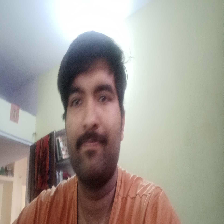

In [16]:
newimage

In [17]:
newimage1 = image.img_to_array(newimage)
newimage1=np.expand_dims(newimage1,axis=0)

In [18]:
x  = newmodel.predict(newimage1)
print(x)
if(x[0][0]==0):
    print("rohan")
else:
    print("not rohan")

[[0.]]
rohan


In [19]:
newmodel.save('rohanfacerecognisation.h5')